### EXEMPLO DE ANÁLISE APRESENTADO NA SEMANA 2
**Marcos Ferreira da Silva**   

Análise do Coeficiente de Mortalidade Infantil (CMI)  
 
$CMI = 1000 * \frac{óbitos de menores do que um ano}{ de nascidos vivos}$  
 
 CMI: bom indicador de saúde  
 

In [1]:
## Definição do diretório de trabalho (diretório onde o R buscará arquivos ou para onde exportará arquivos)
setwd('F:\\videos_curso_big_data\\week_2')

In [7]:
## Importação do conjunto de dados
Municipios <- read.csv2("Municipios.csv")

In [8]:
## Verificar se tudo correu bem no processo de importação
str(Municipios)

'data.frame':	5565 obs. of  2 variables:
 $ CMI  : Factor w/ 3797 levels "0","1.149425287",..: 1677 853 1220 1089 1826 2502 1899 2649 2088 1713 ...
 $ renda: Factor w/ 5366 levels "1001.62","1001.78",..: 2874 4362 2739 4624 3516 3155 2479 2164 3647 2930 ...


As variáveis `CMI` e `renda` foram importados como fatores, quando deveriam ter sido importadas como números reais. A conversão pode ser feita da seguinte forma:

In [9]:
Municipios <- transform(Municipios,  CMI = as.numeric(as.character(CMI)),
                                   renda = as.numeric(as.character(renda))) 



Vamos inspecionar agora.

In [11]:
str(Municipios)

'data.frame':	5565 obs. of  2 variables:
 $ CMI  : num  16.2 13.2 14.5 14 16.8 ...
 $ renda: num  468 673 447 719 553 ...



Aparentemente está tudo ok. Vamos agora a um resumo dos dados:

In [12]:
summary(Municipios)

      CMI            renda        
 Min.   : 0.00   Min.   :  95.59  
 1st Qu.:10.67   1st Qu.: 275.03  
 Median :14.13   Median : 456.30  
 Mean   :14.64   Mean   : 483.40  
 3rd Qu.:18.09   3rd Qu.: 636.91  
 Max.   :88.59   Max.   :2008.98  

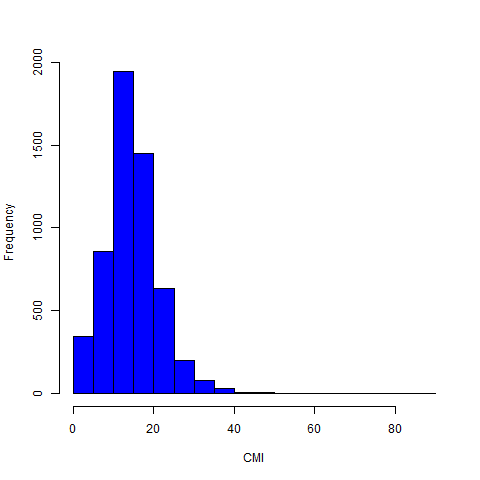

In [14]:
hist (Municipios$CMI, main='', xlab='CMI', col='blue')

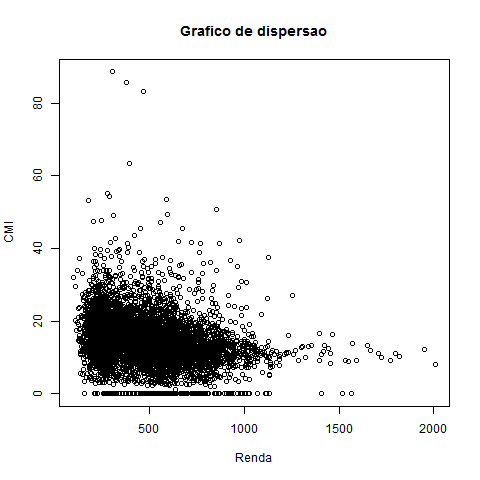

In [21]:
#Gráfico de dispersao para a associação entre CMI e Renda
plot (x = Municipios$renda, y = Municipios$CMI,
      main = "Grafico de dispersao",
      xlab = "Renda",
      ylab = "CMI")


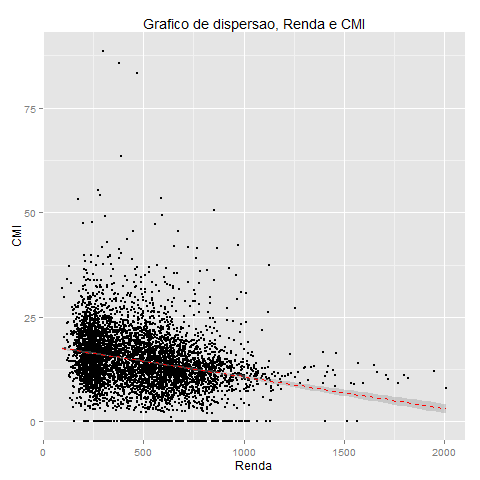

In [20]:
#Gr?fico de dispersao com o ggplot2
library(ggplot2)
ggplot (data= Municipios, aes(x=renda, y=CMI)) + 
  geom_point(size=0.4) +
  geom_smooth(method="lm", color ="red", linetype=2) +
  labs(title = "Grafico de dispersao, Renda e CMI", x="Renda", y="CMI")



In [17]:
#Criar modelo de regress?o entre CMI e Renda
reg <- lm(CMI ~ renda, data = Municipios)

In [18]:
#Resumo dos resultados da regress?o
summary(reg)


Call:
lm(formula = CMI ~ renda, data = Municipios)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.139  -3.793  -0.296   3.242  72.580 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.288359   0.204346    89.5   <2e-16 ***
renda       -0.007541   0.000379   -19.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.753 on 5563 degrees of freedom
Multiple R-squared:  0.06645,	Adjusted R-squared:  0.06628 
F-statistic:   396 on 1 and 5563 DF,  p-value: < 2.2e-16
